In [1]:
from pandas.core.indexes import datetimes
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import gurobipy as gp
import pandas as pd

# 1. (30%) Consider a production company who owns 3 plants to produce 2 consumer goods. If the available capacity and its uses are given in the following table, try to find an Efficient Set of product mixes if maximal profit and minimal pollution penalty are considered by using (Wang, 2004)
題目假設：  
製作 1 單位 product1 需要 1 單位 plant1 及 3 單位 plant 3  
製作 1 單位 product2 需要 2 單位 plant2 及 2 單位 plant 3  

## (a) Graphical solution by the “Concept of Dominance”

模型列式：  
maximun profit: $$Max: 3x_1 + 5x_2$$
minimun penalty: $$Min: 3x_1 + 4x_2$$


$s.t.$
$$x_1 ≤ 4$$
$$2x_2 ≤ 12$$
$$3x_1+2x_2 ≤ 18$$
$$x_1, x_2 ≥ 0$$

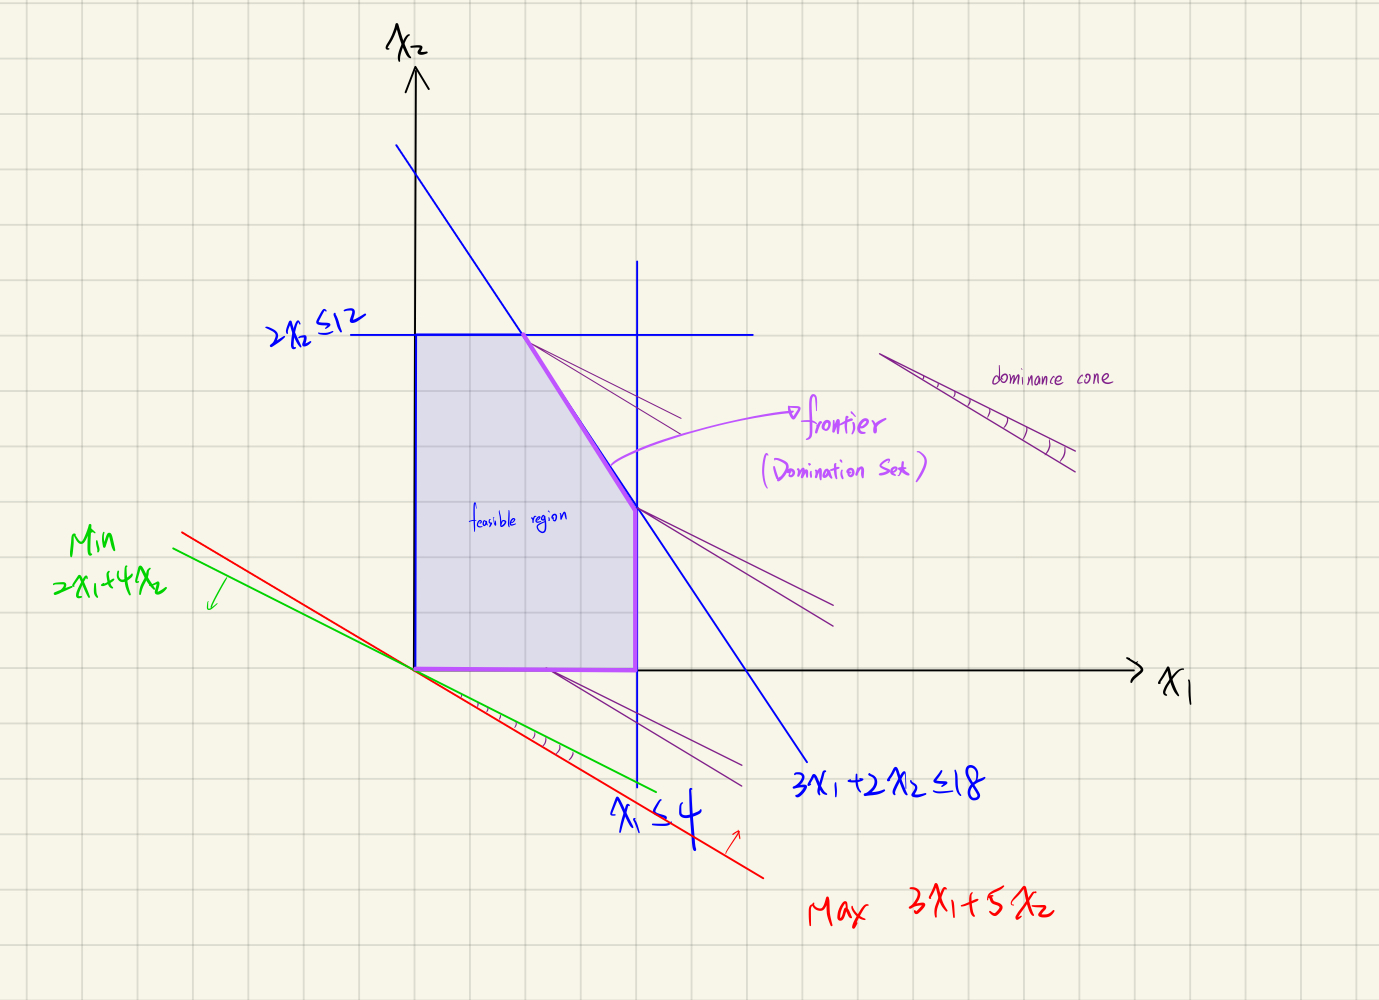

## (b) Weighting method with weights 2:1 w.r.t. objectives of profit and penalty
#### model:

$$Max: W_1(3x_1+5x_2)-W_2(2x_1+4x_2)$$
$s.t.$
$$x_1 ≤ 4$$
$$2x_2 ≤ 12$$
$$3x_1+2x_2 ≤ 18$$
$$x_1, x_2 ≥ 0$$
$$W_1=2, W_2=1$$

In [2]:
W = [2, 1]

w_method = gp.Model("W_method")
x1 = w_method.addVar(vtype=gp.GRB.CONTINUOUS,name="x1", lb=0)
x2 = w_method.addVar(vtype=gp.GRB.CONTINUOUS,name="x2", lb=0)
w_method.update()

w_method.setObjective(W[0]*(3*x1 + 5*x2) - W[1]*(2*x1 + 4*x2), gp.GRB.MAXIMIZE)

w_method.addConstr(x1 <= 4)
w_method.addConstr(2*x2 <= 12)
w_method.addConstr(3*x1 + 2*x2 <= 18)

w_method.optimize()

Academic license - for non-commercial use only - expires 2021-07-12
Using license file /Users/tungwu/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x11ca3af7
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [4e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 2e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 1 rows, 2 columns, 2 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4000000e+01   1.500000e+00   0.000000e+00      0s
       1    4.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  4.400000000e+01


In [9]:
w_obj = w_method.objVal
w_x = w_method.x
w_profit = (3*w_x[0] + 5*w_x[1])
w_penalty = (2*w_x[0] + 4*w_x[1])

print("when (profit : penalty) is (2 : 1)\n")
print("\tprofit is: %d" %w_profit)
print("\tpenalty is: %d" %w_penalty)
print("\tEfficient Set is: (%f, %f)" %(w_x[0], w_x[1]))

when (profit : penalty) is (2 : 1)

	profit is: 36
	penalty is: 28
	Efficient Set is: (2.000000, 6.000000)


## (c) 𝜀 −Constraint Method with r = 2
set maximun profit as first objective, penalty obj as rest k(=1) objective. 
BTW, since there're too less option to chose when r = 2  
we chose r = 3 to get one more option to suggest.  
(note: when t=0 or 2,  r=3 is equal to r=2, t=0 or 1 respectively

In [5]:
f_panalty = gp.Model("f_panalty")

x1 = f_panalty.addVar(vtype=gp.GRB.CONTINUOUS,name="x1", lb=0)
x2 = f_panalty.addVar(vtype=gp.GRB.CONTINUOUS,name="x2", lb=0)
f_panalty.update()

f_panalty.setObjective(-(2*x1 + 4*x2), gp.GRB.MAXIMIZE)

f_panalty.addConstr(x1 <= 4)
f_panalty.addConstr(2*x2 <= 12)
f_panalty.addConstr(3*x1 + 2*x2 <= 18)

f_panalty.optimize()

f_panalty_min = gp.Model("f_panalty")

x1 = f_panalty_min.addVar(vtype=gp.GRB.CONTINUOUS,name="x1", lb=0)
x2 = f_panalty_min.addVar(vtype=gp.GRB.CONTINUOUS,name="x2", lb=0)
f_panalty_min.update()

f_panalty_min.setObjective(-(2*x1 + 4*x2), gp.GRB.MINIMIZE)

f_panalty_min.addConstr(x1 <= 4)
f_panalty_min.addConstr(2*x2 <= 12)
f_panalty_min.addConstr(3*x1 + 2*x2 <= 18)

f_panalty_min.optimize()


Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xa5244240
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 2e+01]
Presolve removed 3 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective -0.000000000e+00
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xe1ea874a
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range

In [6]:
R = 3
T = np.arange(R)
c_methods = []
for t in T:
    c_methods.append(gp.Model("W_method"))
    e = f_panalty_min.objVal + (t / (R-1))*(f_panalty.objVal - f_panalty_min.objVal)
    x1 = c_methods[t].addVar(vtype=gp.GRB.CONTINUOUS,name="x1", lb=0)
    x2 = c_methods[t].addVar(vtype=gp.GRB.CONTINUOUS,name="x2", lb=0)
    c_methods[t].update()

    c_methods[t].setObjective(W[0]*(3*x1 + 5*x2) - W[1]*(2*x1 + 4*x2), gp.GRB.MAXIMIZE)

    c_methods[t].addConstr(-(2*x1 + 4*x2) >= e)
    c_methods[t].addConstr(x1 <= 4)
    c_methods[t].addConstr(2*x2 <= 12)
    c_methods[t].addConstr(3*x1 + 2*x2 <= 18)

    c_methods[t].optimize()
    print("\n\n===========\n\n")


Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x873002ba
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [4e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 3e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6000000e+01   1.600000e+01   0.000000e+00      0s
       2    4.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  4.400000000e+01




Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x3879c27f
Coefficient statistics:
  Matrix ra

In [7]:
print([c_methods[t].objVal for t in T])
print([c_methods[t].x for t in T])

[44.0, 25.0, -0.0]
[[2.0, 6.0], [4.0, 1.5], [0.0, 0.0]]


In [10]:
print("when r = 3\n")
for t in T:
    c_profit = c_methods[t].objVal
    c_penalty = 2*c_methods[t].x[0] + 4*c_methods[t].x[1]
    print("\twhen t = %d" %t)
    print("\tprofit is: %d" %c_profit)
    print("\tpenalty is: %d" %c_penalty)
    print("\tEfficient Set is: (%f, %f)" %(c_methods[t].x[0], c_methods[t].x[1]))
    print()

when r = 3

	when t = 0
	profit is: 44
	penalty is: 28
	Efficient Set is: (2.000000, 6.000000)

	when t = 1
	profit is: 25
	penalty is: 14
	Efficient Set is: (4.000000, 1.500000)

	when t = 2
	profit is: 0
	penalty is: 0
	Efficient Set is: (0.000000, 0.000000)



# 2. (20%) Discuss the efficient sets from the following graph of two criteria: (Wang, 2004)

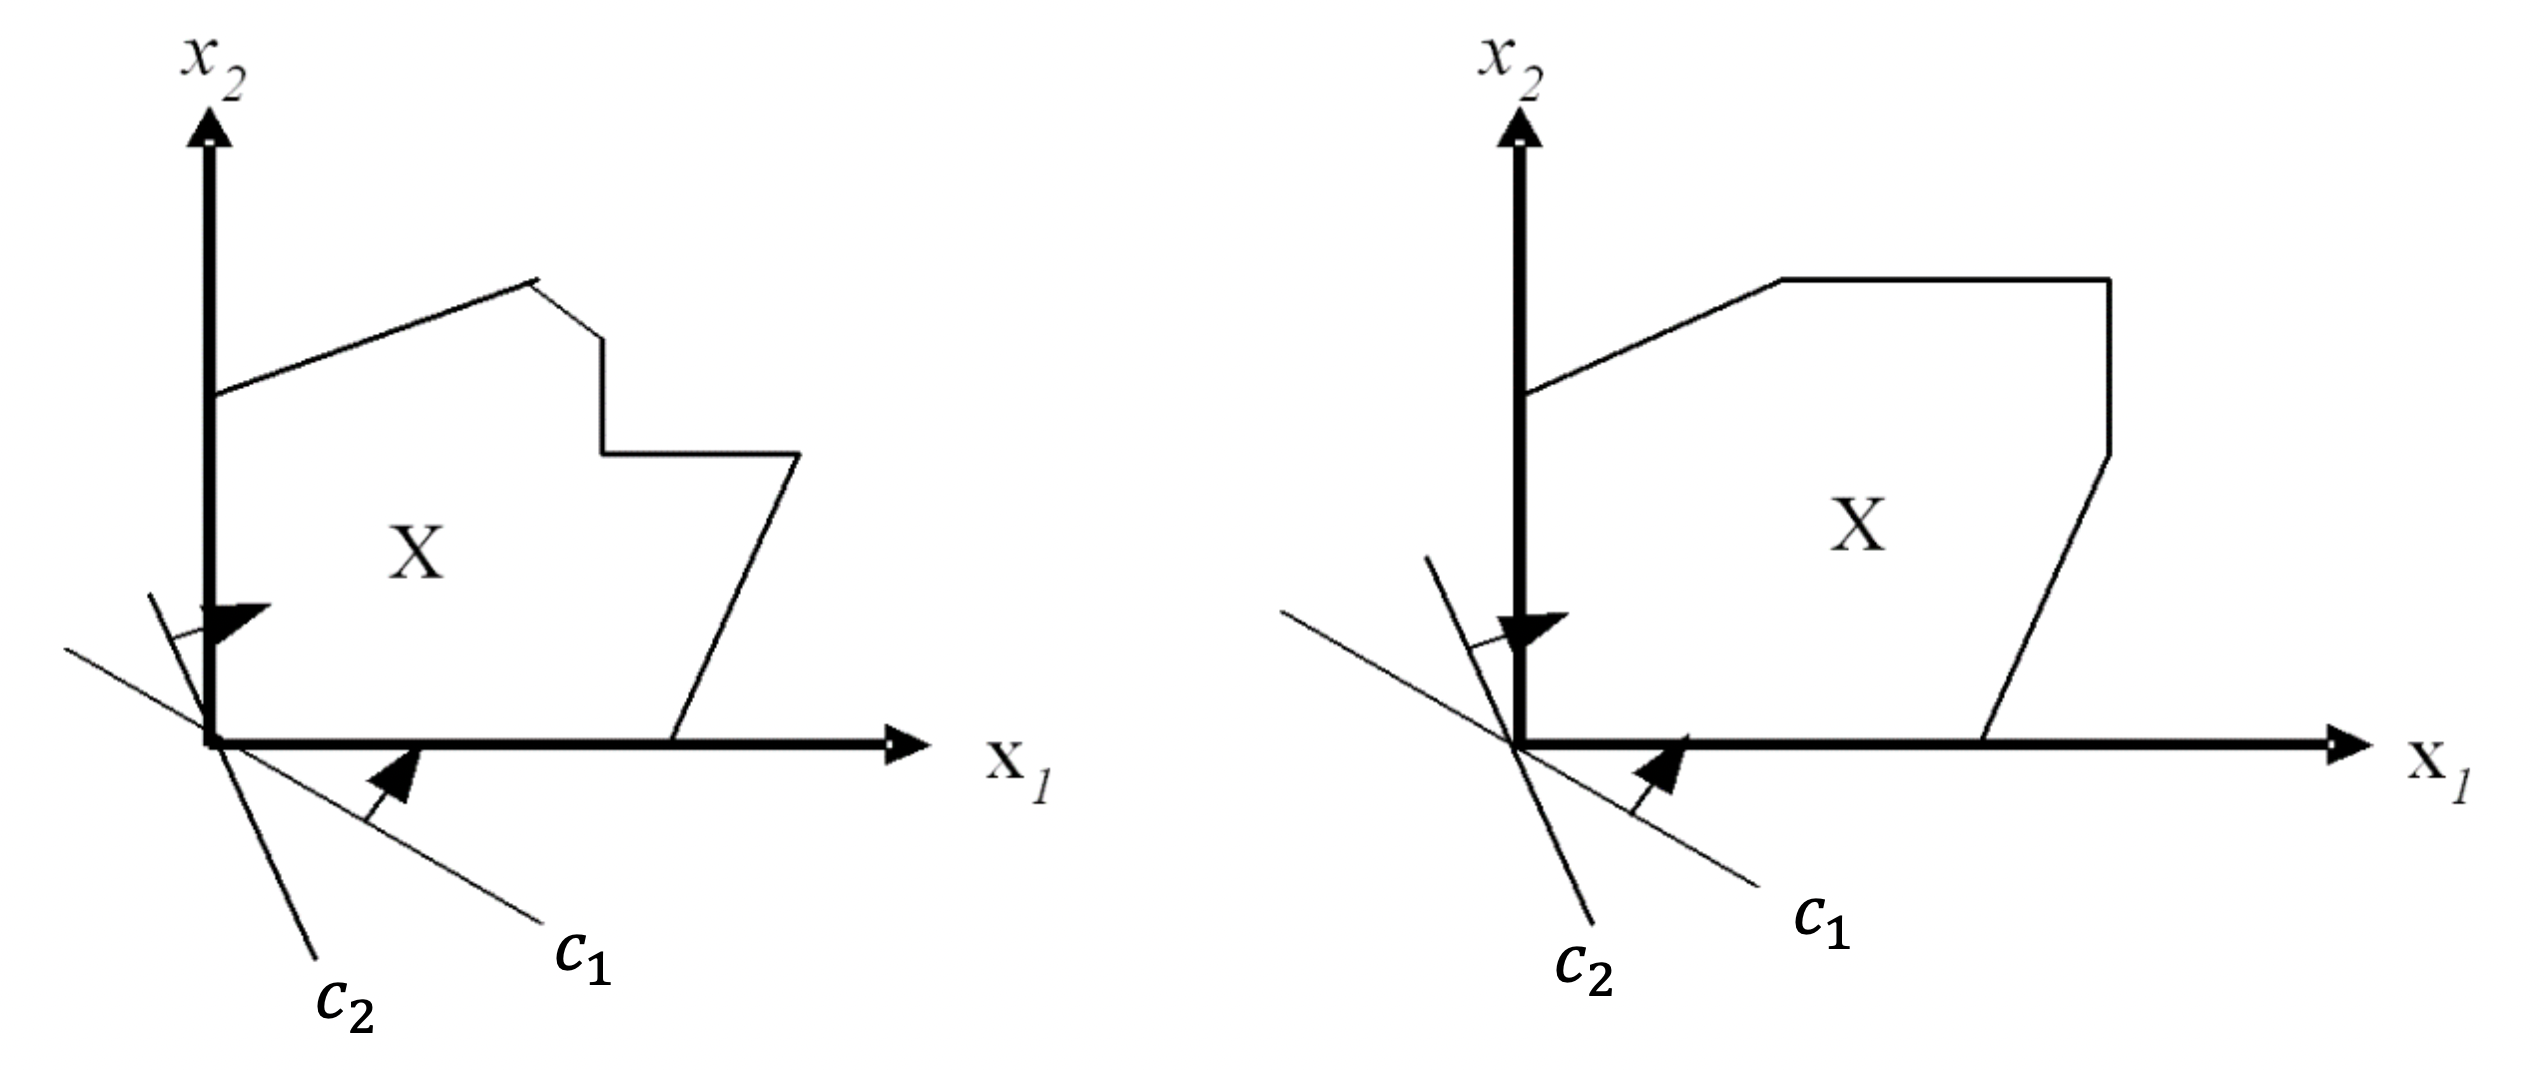

##### Ans:
當 C1, C2 線分別往最大化的法向量（箭頭方向）移動時，同時處於兩線的重疊區域，稱之 dominant cone，如可行解域有解能處在 cone 的焦點處，且當時的 cone 之內沒有其他可行解，則該點可不被其他鄰近的點 dominate，我們稱該點為 dominant point，其集合稱為 efficient sets，此題的 dominant cone 如下：

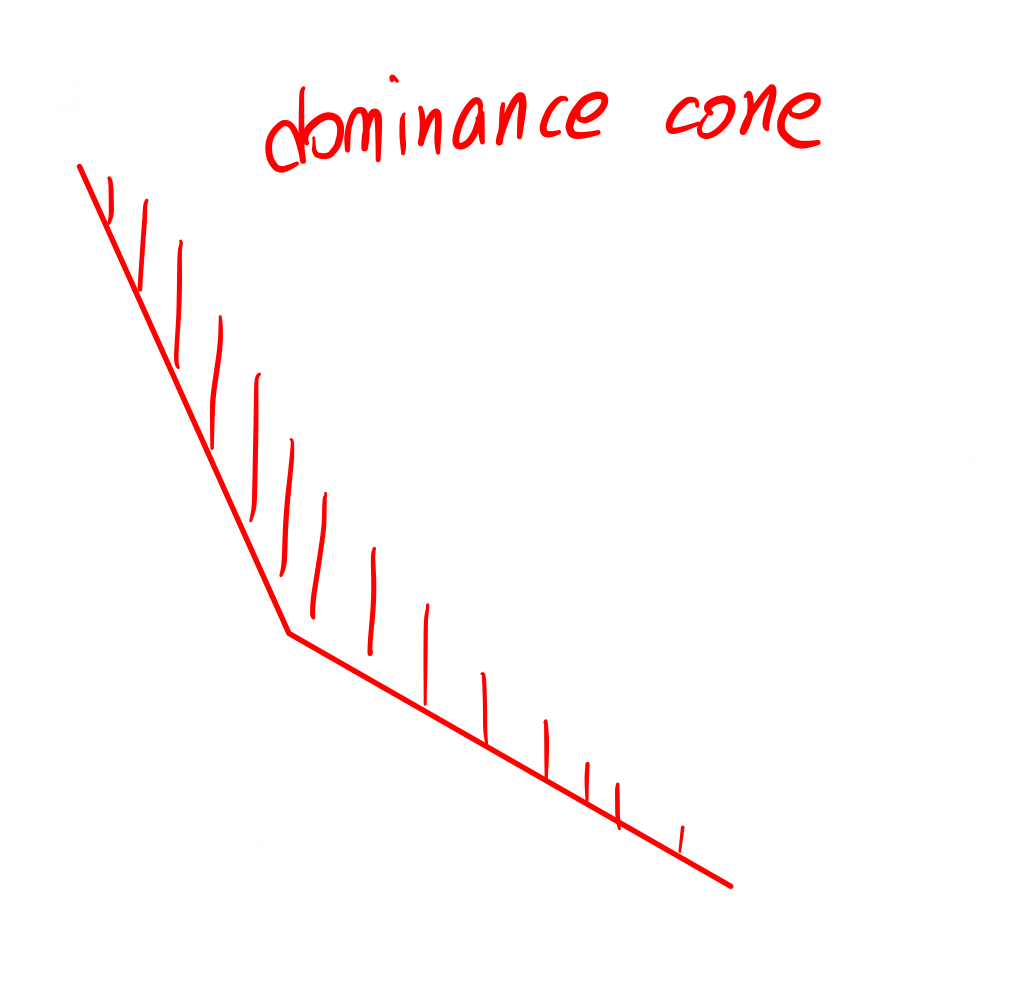

而左圖的 dominant set 如下藍色筆跡所描：  


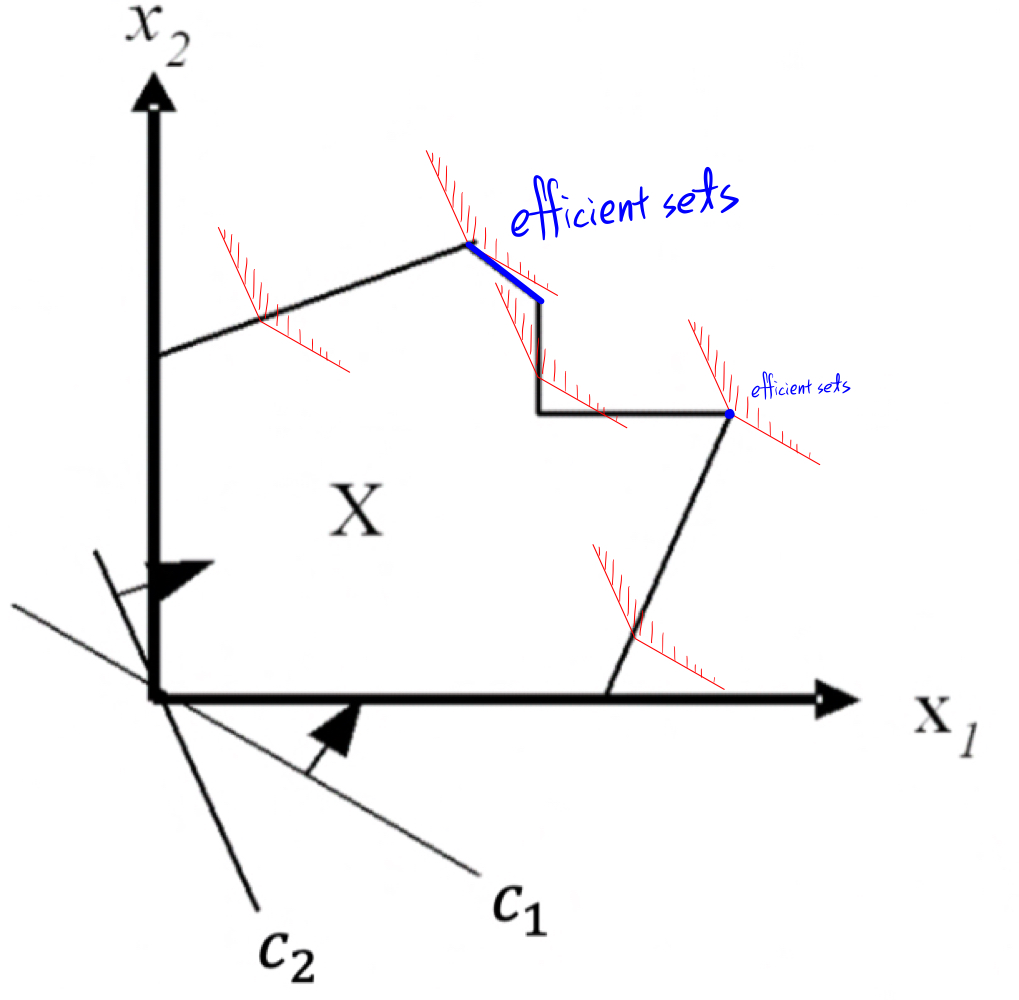

右圖的 dominant set 如下藍色筆跡所描：
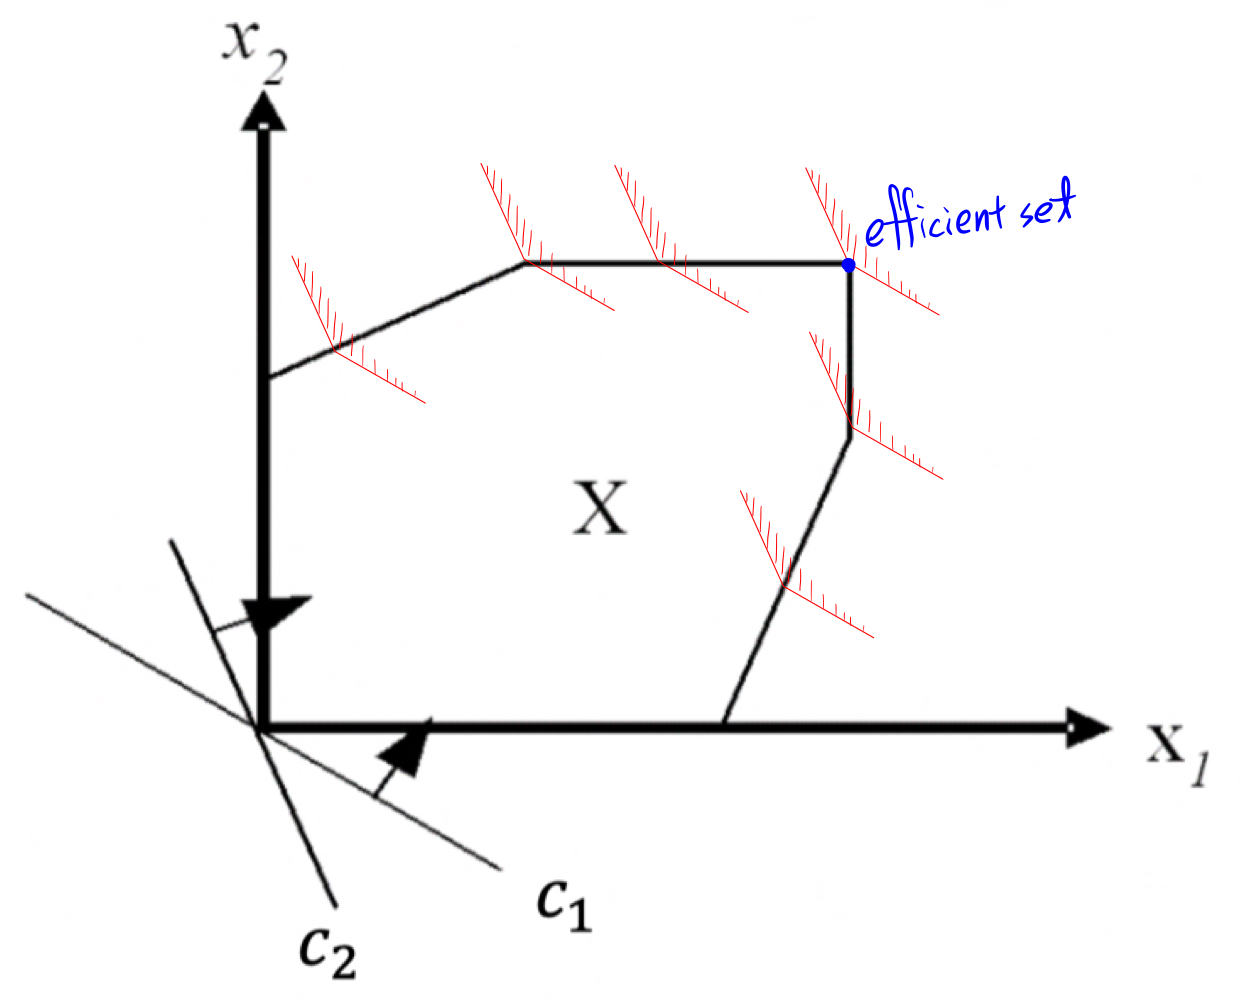

# 3. (50%) Data Envelopment Analysis (DEA)

## (a) Define the decision variables and LP formulation
#### **CRS** model for each $DMU_r$,  
- decision variables: 
    - $v^r_i :$ weight of input $i$ each $DMU_r$ hold,  $i: {(Personnel, Expenses (unit:1000), Space)}$
    - $u^r_j :$ weight of output $j$ each $DMU_r$ hold,  $j: {(Teaching, Publications, Grants (unit:1000))}$


- LP formulation:
    - $K: $ DMU sets
    - $x^k_i: $ input $i$ for $DMU_k$, $i \in I: {(Personnel, Expenses (unit:1000), Space)}$
    - $y^k_j: $ output $i$ for $DMU_k$, $j \in J: {(Teaching, Publications, Grants (unit:1000))}$
    - model:$$Max: \sum_{j \in J}(u^r_j * y^r_j)$$
    $s.t.$  
    $$\sum_{i \in I}(v^r_i * x^r_i) = 1$$  
    $$\sum_{j \in J}(u^r_j * y^k_j - \sum_{i \in I}(v^r_i * x^k_i) ≤ 1 , \text{for } k \in K$$  
    $$v^r_j, u^r_j ≥ 0$$  
    $$j \in J, i \in I$$  

#### **VRS** model for each $DMU_r$,  
- decision variables: 
    - $v^r_i :$ weight of input $i$ each $DMU_r$ hold,  $i: {(Personnel, Expenses (unit:1000), Space)}$
    - $u^r_j :$ weight of output $j$ each $DMU_r$ hold,  $j: {(Teaching, Publications, Grants (unit:1000))}$
    - $u^r_0: $ 允許生產函數不必通過原點，可用來判斷規模報酬型態
        - $u^r_0=0: $ 為固定規模報酬(CRS)
        - $u^r_0<0: $ 為規模報酬遞增(IRS)
        - $u^r_0>0: $ 為規模報酬遞減(DRS)


- LP formulation:
    - $K: $ DMU sets
    - $x^k_i: $ input $i$ for $DMU_k$, $i \in I: {(Personnel, Expenses (unit:1000), Space)}$
    - $y^k_j: $ output $i$ for $DMU_k$, $j \in J: {(Teaching, Publications, Grants (unit:1000))}$
    - model:$$Max: \sum_{j \in J}(u^r_j * y^r_j) - u^r_0$$
    $s.t.$  
    $$\sum_{i \in I}(v^r_i * x^r_i) = 1$$  
    $$\sum_{j \in J}(u^r_j * y^k_j - \sum_{i \in I}(v^r_i * x^k_i) - u^r_0 ≤ 1 , \text{for } k \in K$$
    $$v^r_j, u^r_j ≥ 0$$
    $$j \in J, i \in I$$

In [68]:
data = pd.read_excel("ORA_Assignment_04_DEA.xlsx", header=0)

In [69]:
SCHOOLS = [item for item in data["School"] if isinstance(item, str)]

In [85]:
SCHOOL_DATA = {}
schools, deps = [], []
for index, row in data.iterrows():
    if isinstance(row["School"], str):
        school = row["School"]
        SCHOOL_DATA[school] = pd.DataFrame(data=None, columns=data.columns[1:])b
    else:
        SCHOOL_DATA[school] = SCHOOL_DATA[school].append(pd.DataFrame(pd.DataFrame(data=row[1:]).T, columns=data.columns[1:]))
        schools.append(school)
        deps.append(row["Department"])

In [88]:
IDX = pd.MultiIndex.from_arrays([schools, deps], names=["School", "Department"])
collect = pd.concat([SCHOOL_DATA[school].iloc[:] for school in SCHOOLS]).drop(["Department"], axis=1)
VALUE_DATA = pd.DataFrame(data=np.array(collect), columns=collect.columns, index=IDX)
VALUE_DATA.head()

Personnel Expenses (unit:1000) Space Teaching  \
School       Department                                                        
Liberal Arts Chinese                33.5               6079.5  5376    26131   
             Foreign Languages      36.5               8387.4  4574    40105   
             History                  26               5104.8  3795    13678   
             Arts                      6               3420.6  1610     4926   
Sciences     Mathematics            29.5               6426.2  4175    23647   

                               Publications Grants (unit:1000)  
School       Department                                         
Liberal Arts Chinese                      5             4250.9  
             Foreign Languages            0             1543.5  
             History                      0             1729.1  
             Arts                         0             3562.2  
Sciences     Mathematics                 27            10518.6

In [71]:
I = 3
O = 3
INPUTS = [i for i in  data.columns[2:2+I]]
OUTPUTS = [o for o in  data.columns[2+I:2+I+O]]

In [72]:
for index, row in SCHOOL_DATA[SCHOOLS[0]].iterrows():
    print([row[i] for i in INPUTS])
    print()


[33.5, 6079.5, 5376.0]

[36.5, 8387.4, 4574.0]

[26.0, 5104.8, 3795.0]

[6.0, 3420.6, 1610.0]



In [73]:
DMU = []
X = {}
Y = {}
for s in SCHOOLS:
    for index, row in SCHOOL_DATA[s].iterrows():
        DMU = DMU + [row.iloc[0]]
        X[row.iloc[0]] = [i for i in row.iloc[1:4]]
        Y[row.iloc[0]] = [o for o in row.iloc[4:]]


In [74]:
record = {}  

## cal technical efficiency (VRS) and scale efficiency (CRS) for each DMU
for r in DMU:            
    
    ## VRS
    vrs_model=gp.Model("VRS_model")
    
    ## add variables
    vrs_v, vrs_u,u0={},{},{}
    for i in range(I):
        vrs_v[r,i]=vrs_model.addVar(vtype=gp.GRB.CONTINUOUS,name="%s"%(INPUTS[i]))
    
    for j in range(O):
        vrs_u[r,j]=vrs_model.addVar(vtype=gp.GRB.CONTINUOUS, name="%s"%(OUTPUTS[j]))
    u0[r]=vrs_model.addVar(lb=-1000,vtype=gp.GRB.CONTINUOUS, name="u_0")
    
    vrs_model.update()
    
    ## objective
    vrs_model.setObjective(gp.quicksum(vrs_u[r,j]*Y[r][j] for j in range(O))-u0[r],gp.GRB.MAXIMIZE)
    
    ## add constraints
    vrs_model.addConstr(gp.quicksum(vrs_v[r,i]*X[r][i] for i in range(I))==1)
    for k in DMU:
        vrs_model.addConstr(gp.quicksum(vrs_u[r,j]*Y[k][j] for j in range(O))-gp.quicksum(vrs_v[r,i]*X[k][i] for i in range(I))-u0[r] <=0)
    
    ## solve
    vrs_model.optimize()
    
    ## cal scale efficiency (CRS) for each dmu    
    crs_model=gp.Model("CRS_model")
    
    ## add variables
    crs_v, crs_u = {},{}
    for i in range(I):
        crs_v[r,i]=crs_model.addVar(vtype=gp.GRB.CONTINUOUS,name="v_%s%d"%(r,i))
    
    for j in range(O):
        crs_u[r,j]=crs_model.addVar(vtype=gp.GRB.CONTINUOUS,name="u_%s%d"%(r,j))
    
    crs_model.update()
    
    ## objective
    crs_model.setObjective(gp.quicksum(crs_u[r,j] * Y[r][j] for j in range(O)), gp.GRB.MAXIMIZE)
    
    ## add constraints
    crs_model.addConstr(gp.quicksum(crs_v[r,i] * X[r][i] for i in range(I)) == 1)
    for k in DMU:
        crs_model.addConstr(gp.quicksum(crs_u[r,j]*Y[k][j] for j in range(O)) - gp.quicksum(crs_v[r,i]*X[k][i] for i in range(I)) <= 0)
    
    ## solve
    crs_model.optimize()
    
    record[r] = np.round([v.x for v in vrs_model.getVars()] + [vrs_model.objVal] + [crs_model.objVal], 6)



Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 42 rows, 7 columns and 284 nonzeros
Model fingerprint: 0xd1a9ea3b
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 3e+04]
  Bounds range     [1e+03, 1e+03]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 42 rows, 7 columns, 284 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1537676e+32   4.699710e+31   1.153768e+02      0s
       7    9.6828152e-01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds
Optimal objective  9.682815161e-01
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 42 rows, 6 columns and 243 nonzeros
Model fingerprint: 0x4574a645
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objectiv

In [75]:
def judge_RS(u0):
    if u0 > 0:
        return "DRS"
    elif u0 < 0:
        return "IRS"
    return "CRS"


## (b) Show the results of overall efficiency (OE, CRS model), technical efficiency (TE, VRS model), scale efficiency (SE)

In [91]:
col = [v.varName for v in vrs_model.getVars()] + ["TE", "OE"]
result = pd.DataFrame(data=record).T
result.columns = col
result["SE"] = np.round(result["OE"] / result["TE"], 3)
result["return to scale"] = [judge_RS(u0=u0) for u0 in result["u_0"]]
result = result.set_index(keys=IDX)
result

Personnel  Expenses (unit:1000)  \
School          Department                                              
Liberal Arts    Chinese                0.000000              0.000164   
                Foreign Languages      0.000000              0.000000   
                History                0.000000              0.000196   
                Arts                   0.164011              0.000000   
Sciences        Mathematics            0.000000              0.000141   
                Physics                0.000000              0.000096   
                Chemistry              0.028413              0.000000   
                Earth Sciences         0.046929              0.000020   
                Biology                0.051698              0.000006   
                Biotechnology          0.000000              0.000000   
Engineering     Mechanical Eng.        0.000000              0.000070   
                Electrical Eng.        0.017606              0.000000   
                Information Eng.       0.055340              0.000000   
                Chemical Eng.          0.008617              0.000054   
                Resources Eng.         0.026376              0.000057   
                Materials Eng.         0.038462              0.000000   
                Civil Eng.             0.028214              0.000001   
                Hydraulic Eng.         0.036364              0.000000   
                Architecture           0.035088              0.000000   
                Engineering Science    0.036805              0.000000   
                Naval Architecture     0.035657              0.000053   
                Urban Planning         0.055049              0.000005   
                Industrial Design      0.080000              0.000000   
                Aeronautical Eng.      0.000000              0.000115   
                Environmental Eng.     0.049811              0.000000   
                Surveying Eng.         0.045606              0.000036   
                Manufacturing Eng.     0.119548              0.000000   
                Biomedical Eng.        0.100000              0.000000   
Management      Industrial Mgmt.       0.018578              0.000068   
                Transportation Mgmt.   0.030573              0.000073   
                Business Admin.        0.029031              0.000000   
                Accountancy            0.066667              0.000000   
                Statistics             0.000000              0.000239   
Medicine        Medicine               0.000000              0.000025   
                Nursing                0.008559              0.000000   
                Medical Technology     0.000000              0.000050   
                Occupational Therapy   0.054852              0.000154   
                Physical Therapy       0.048211              0.000152   
Social Sciences Political Economy      0.000000              0.000000   
                Education              0.000000              0.000548   
                Law                    0.000000              0.000000   

                                         Space  Teaching  Publications  \
School          Department                                               
Liberal Arts    Chinese               0.000000  0.000032      0.006843   
                Foreign Languages     0.000219  0.000424      0.000000   
                History               0.000000  0.000034      0.000000   
                Arts                  0.000010  0.000131      0.000000   
Sciences        Mathematics           0.000022  0.000033      0.009524   
                Physics               0.000013  0.000022      0.006270   
                Chemistry             0.000008  0.000026      0.003606   
                Earth Sciences        0.000031  0.000044      0.001109   
                Biology               0.000000  0.000042      0.001159   
                Biotechnology         0.000856  0.000000      0.000000   
Engineerin

In [77]:
result.to_csv("DEA_result.csv", float_format='%.6f')

In [96]:
result_read = (pd.read_csv("DEA_result.csv", index_col=0))
result_read = pd.DataFrame(data=np.array(result_read), columns=result_read.columns, index=IDX)
result_read.head()

Personnel Expenses (unit:1000)     Space  \
School       Department                                                   
Liberal Arts Chinese                   0             0.000164         0   
             Foreign Languages         0                    0  0.000219   
             History                   0             0.000196         0   
             Arts               0.164011                    0     1e-05   
Sciences     Mathematics               0             0.000141   2.2e-05   

                                Teaching Publications Grants (unit:1000)  \
School       Department                                                    
Liberal Arts Chinese             3.2e-05     0.006843                  0   
             Foreign Languages  0.000424            0                  0   
             History             3.4e-05            0                  0   
             Arts               0.000131            0                  0   
Sciences     Mathematics         3.3e-05     0.009524                  0   

                                     u_0        TE        OE     SE  \
School       Department                                               
Liberal Arts Chinese             -0.1009  0.968282  0.935939  0.967   
             Foreign Languages   16.0008         1         1      1   
             History           -0.190536  0.660915  0.567983  0.859   
             Arts              -0.355262         1  0.770042   0.77   
Sciences     Mathematics        0.037731         1         1      1   

                               return to scale  
School       Department                         
Liberal Arts Chinese                       IRS  
             Foreign Languages             DRS  
             History                       IRS  
             Arts                          IRS  
Sciences     Mathematics                   DRS

In [79]:

## 3D plotting
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

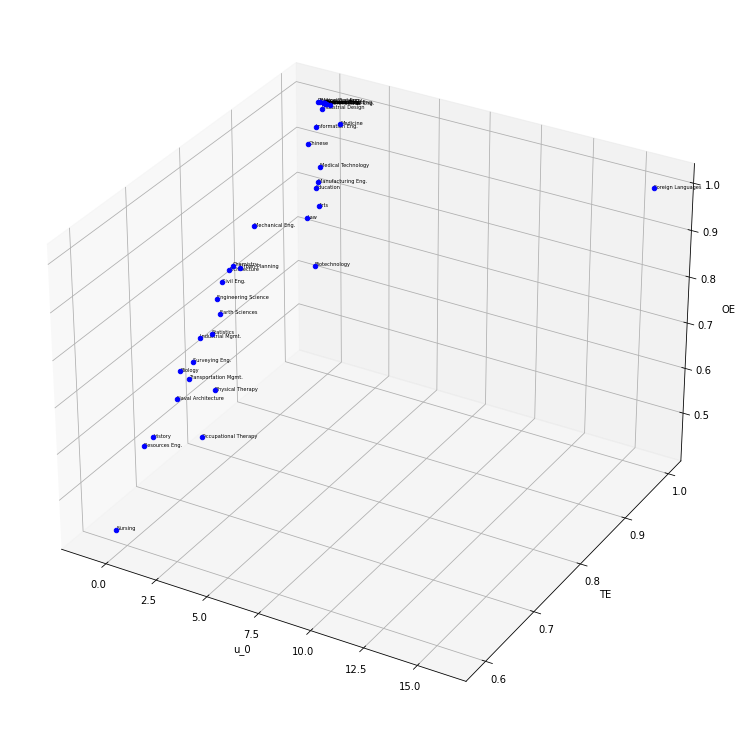

In [98]:
plot_data = pd.DataFrame(data=result_read["u_0"])
plot_data["TE"] = list(result_read["TE"])
plot_data["OE"] = list(result_read["OE"])

m = np.array(plot_data)# m is an array of (x,y,z) coordinate triplets

fig = figure(figsize=(10, 20))
ax = Axes3D(fig)

dot_name = deps

for i in range(len(m)): #plot each point + it's index as text above
 ax.scatter(m[i,0],m[i,1],m[i,2], color='b') 
 ax.text(m[i,0],m[i,1],m[i,2], '%s' % (dot_name[i]), size=5, zorder=1, color='k') 

ax.set_zlabel('OE')
ax.set_ylabel('TE')
ax.set_xlabel('u_0')
pyplot.show()

In [103]:
## find efficient point
best = pd.DataFrame(columns=result_read.columns)
for index, row in result_read.iterrows():
    if row["TE"] == 1:
        if row["OE"] == 1:
            best = best.append(row)
best

,Personnel,Expenses (unit:1000),Space,Teaching,Publications,Grants (unit:1000),u_0,TE,OE,SE,return to scale
"(Liberal Arts, Foreign Languages)",0.000000,0.000000,0.000219,0.000424,0.000000,0.000000,16.000831,1.0,1.0,1.0,DRS
"(Sciences, Mathematics)",0.000000,0.000141,0.000022,0.000033,0.009524,0.000000,0.037731,1.0,1.0,1.0,DRS
"(Sciences, Physics)",0.000000,0.000096,0.000013,0.000022,0.006270,0.000000,0.021376,1.0,1.0,1.0,DRS
"(Engineering, Electrical Eng.)",0.017606,0.000000,0.000000,0.000016,0.000000,0.000002,0.027833,1.0,1.0,1.0,DRS
"(Engineering, Chemical Eng.)",0.008617,0.000054,0.000000,0.000015,0.004014,0.000000,-0.075069,1.0,1.0,1.0,IRS
"(Engineering, Materials Eng.)",0.038462,0.000000,0.000000,0.000030,0.000951,0.000004,-0.060398,1.0,1.0,1.0,IRS
"(Engineering, Hydraulic Eng.)",0.036364,0.000000,0.000000,0.000000,0.000000,0.000006,-0.082979,1.0,1.0,1.0,IRS
"(Engineering, Aeronautical Eng.)",0.000000,0.000115,0.000000,0.000008,0.008356,0.000003,0.225161,1.0,1.0,1.0,DRS
"(Engineering, Environmental Eng.)",0.049811,0.000000,0.000015,0.000000,0.005173,0.000008,-0.065168,1.0,1.0,1.0,IRS
"(Engineering, Biomedical Eng.)",0.100000,0.000000,0.000000,0.000000,0.018800,0.000000,-0.304400,1.0,1.0,1.0,IRS


In [107]:
best.index[0][1]

'Foreign Languages'

In [108]:
def get_value_df(df):
    df_copy = df.copy()
    for dep in range(len(df_copy.index)):
        for i in range(3):
            df_copy.iloc[dep, i] = X[df_copy.index[dep][1]][i]
            df_copy.iloc[dep, i+3] = Y[df_copy.index[dep][1]][i]
    return df_copy

## (c) i) Which dept. does show a better performance? Why?

依照原本表格的順序，其 TE、OE 皆為 1 的學校如下表所式：  
以下各個科系都有其輸出較優勢的地方（如 Electrical Eng.、Aeronautical Eng. 等)；同時，也有運用較少資源的科系（如 Biomedical Eng.、Political Economy）  
利用擅長的能力最大化輸出，則可以讓其效率提昇

In [109]:
best_value = get_value_df(best)
best_value

,Personnel,Expenses (unit:1000),Space,Teaching,Publications,Grants (unit:1000),u_0,TE,OE,SE,return to scale
"(Liberal Arts, Foreign Languages)",36.5,8387.4,4574.0,40105.0,0.0,1543.5,16.000831,1.0,1.0,1.0,DRS
"(Sciences, Mathematics)",29.5,6426.2,4175.0,23647.0,27.0,10518.6,0.037731,1.0,1.0,1.0,DRS
"(Sciences, Physics)",44.8,9360.1,8184.0,27613.0,66.0,60912.4,0.021376,1.0,1.0,1.0,DRS
"(Engineering, Electrical Eng.)",56.8,17607.4,25770.0,46582.0,161.0,160768.2,0.027833,1.0,1.0,1.0,DRS
"(Engineering, Chemical Eng.)",46.0,11161.6,27410.0,28664.0,120.0,58183.2,-0.075069,1.0,1.0,1.0,IRS
"(Engineering, Materials Eng.)",26.0,8975.2,6326.0,16284.0,95.3,101281.4,-0.060398,1.0,1.0,1.0,IRS
"(Engineering, Hydraulic Eng.)",27.5,8506.4,9435.0,13059.0,17.5,165046.9,-0.082979,1.0,1.0,1.0,IRS
"(Engineering, Aeronautical Eng.)",57.5,8718.2,12550.0,18029.0,70.0,153755.8,0.225161,1.0,1.0,1.0,DRS
"(Engineering, Environmental Eng.)",19.0,6593.6,3548.0,8609.0,35.0,91704.7,-0.065168,1.0,1.0,1.0,IRS
"(Engineering, Biomedical Eng.)",10.0,4490.1,3937.0,6263.0,37.0,28470.8,-0.304400,1.0,1.0,1.0,IRS


## (c) ii) Which dept. does show a poor performance? Why? Any suggestion to improve productivity?
以下為最糟的科系：Nursing 的各項指標  
因其 IRS，故可考慮增加規模來達到 MPSS；但在此之前，可先考量減少其 expences 的花費，並增加 Teaching 以及 Grants，以提昇整體效率

In [136]:
## worst
temp = 1
for index, row in result_read.iterrows():
    if row["TE"] < temp:
        worst = row.copy()
        temp = row["TE"]
worst

Personnel               0.008559
Expenses (unit:1000)           0
Space                   0.000393
Teaching                 3.3e-05
Publications            0.020007
Grants (unit:1000)             0
u_0                    -0.267515
TE                      0.590562
OE                      0.433198
SE                         0.734
return to scale              IRS
Name: (Medicine, Nursing), dtype: object

In [141]:
## worst data
VALUE_DATA.loc[worst.name]

Personnel                   17
Expenses (unit:1000)    5212.2
Space                     2175
Teaching                  6500
Publications               5.5
Grants (unit:1000)      5399.1
Name: (Medicine, Nursing), dtype: object

## (d) i) Which school does show a better average performance? Why?
#### 以下是根據學校的效率做平均的結果：
Social Sciences 因為在投入的成本偏低，而在 Teaching_avg 與 Grants_avg 都不致於太差，故其 TE 與 OE 均在高位
## (d) ii) Which school does show a poor average performance? Why? Any suggestion to improve productivity?
Medicine 的平均表現比較差，在上小題的科系效率都沒有該 Medicine 的科系便可略之一二，與其表現鄰近的 Engineering 相比，Medicine 在成本上高出較多，並且，成本方面都位居平均高位，但輸出方面卻不盡然，Medicine 可以考慮在能負擔的情況下，降低成本。可考慮從與其他學院差距比例最多的 Personnel_avg 方面著手

In [79]:
## split by school
COL_avg = ["Personnel_avg", "Expenses_avg", "Space_avg", "Teaching_avg", "Publications_avg", "Grants_avg", "TE_avg", "OE_avg", "SE_avg"]
schools_e = pd.DataFrame(columns=COL_avg)
for school in schools_unique:
    schools_e = schools_e.append(pd.DataFrame(data=[[
        np.mean(np.array(VALUE_DATA["Personnel"][school])), 
        np.mean(np.array(VALUE_DATA["Expenses (unit:1000)"][school])), 
        np.mean(np.array(VALUE_DATA["Space"][school])), 
        np.mean(np.array(VALUE_DATA["Teaching"][school])), 
        np.mean(np.array(VALUE_DATA["Publications"][school])), 
        np.mean(np.array(VALUE_DATA["Grants (unit:1000)"][school])), 
        np.mean(np.array(result_read["TE"][school])), 
        np.mean(np.array(result_read["OE"][school])), 
        np.mean(np.array(result_read["SE"][school])), 
        ]], columns=COL_avg, index=[school]))
schools_e

,Personnel_avg,Expenses_avg,Space_avg,Teaching_avg,Publications_avg,Grants_avg,TE_avg,OE_avg,SE_avg
Liberal Arts,25.500000,5748.075000,3838.750000,21210.000000,1.250000,2771.425000,0.907299,0.818491,0.899000
Sciences,24.350000,7003.466667,5542.833333,16011.666667,29.000000,31141.316667,0.885792,0.803450,0.911000
Engineering,27.800000,8831.111111,10610.388889,17244.277778,44.044444,66090.844444,0.896248,0.866121,0.962778
Management,21.680000,5843.740000,4831.200000,17156.200000,8.000000,14985.300000,0.850908,0.804455,0.938200
Medicine,51.260000,10995.060000,7474.000000,14315.400000,92.800000,66535.700000,0.832961,0.647528,0.760600
Social Sciences,11.833333,2726.666667,1306.333333,9265.666667,2.166667,4076.233333,1.000000,0.848250,0.848333
